<a href="https://colab.research.google.com/github/yeb2Binfang/ECE-GY-9163-ML-cyber/blob/main/Lab/MLSec_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3
You must do the project individually. In this HW you will design a backdoor detector for 
BadNets trained on the YouTube Face dataset using the pruning defense discussed in 
class. Your detector will take as input:
1. B, a backdoored neural network classifier with N classes.
2. Dvalid, a validation dataset of clean, labelled images.

What you must output is G a “repaired” BadNet. G has N+1 classes, and given unseen test 
input, it must: 
1. Output the correct class if the test input is clean. The correct class will be in [1,N].
2. Output class N+1 if the input is backdoored.

You will design G using the pruning defense that we discussed in class. That is, you will prune the last convlution layer of BadNet B (the layer just before the FC layers, it should has the pooling layer after) by removing one 
channel at a time from that layer. Channels should be removed in increasing order of average activation values over the entire validation set. Every time you prune a channel, you will  measure the new validation accuracy of the new pruned badnet. You will stop pruning once the  validation accuracy drops atleast X% below the original accuracy. This will be your new 
network B'. Now, your goodnet G works as follows. For each test input, you will run it through both B and  B'. If the classification outputs are the same, i.e., class i, you will output class i. If they differ you  will output N+1. Evaluate this defense on:
1. A BadNet, B1, (“sunglasses backdoor”) on YouTube Face for which we have already  told you what the backdoor looks like. That is, we give you the validation data, and  also test data with examples of clean and backdoored inputs.

Now you must submit:
1. Your repaired networks for X={2%,4%,10%}. The repaired networks will be evaluated using the evaluation script (eval.py) on this website https://github.com/csaw-hackml/CSAW-HackML-2020. This website hosts all the information and data for the project.
2. Plot the accuracy on clean test data and the attack success rate (on backdoored test 
data) as a function of the fraction of channels pruned. 
3. Please create and submit a link to a GitHub repo. with any/all code you have produced in this project along with a Readme that tells us how to run your code and your HW report.



In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import keras
import sys
import h5py
import numpy as np

clean_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/clean/valid.h5'
poisoned_data_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Data/bd/bd_valid.h5'
model_filename = '/content/gdrive/MyDrive/ECE-GY 9163/Lab3/Model/bd_net.h5'

def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def main():
    cl_x_test, cl_y_test = data_loader(clean_data_filename)
    bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

    bd_model = keras.models.load_model(model_filename)

    cl_label_p = np.argmax(bd_model.predict(cl_x_test), axis=1)
    clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
    print('Clean Classification accuracy:', clean_accuracy)
    
    bd_label_p = np.argmax(bd_model.predict(bd_x_test), axis=1)
    asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
    print('Attack Success Rate:', asr)

if __name__ == '__main__':
    main()

Clean Classification accuracy: 98.64899974019225
Attack Success Rate: 100.0


In [4]:
model = keras.models.load_model(model_filename)

In [4]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 55, 47, 3)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 52, 44, 20)   980         ['input[0][0]']                  
                                                                                                  
 pool_1 (MaxPooling2D)          (None, 26, 22, 20)   0           ['conv_1[0][0]']                 
                                                                                                  
 conv_2 (Conv2D)                (None, 24, 20, 40)   7240        ['pool_1[0][0]']                 
                                                                                            

In [17]:
x_data, y_data = data_loader(clean_data_filename)

In [25]:
y = model.predict(x_data[0])

In [39]:
print(y[0])

[2.6487895e-36 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 4.8857488e-23]


In [61]:
print(x_data.shape)

(11547, 55, 47, 3)


In [103]:
layer_output=model_temp.get_layer('pool_3').output
intermediate_model=keras.models.Model(inputs=model_temp.input,outputs=layer_output)
intermediate_prediction=intermediate_model.predict(x_data)
print(intermediate_prediction.shape)

(11547, 5, 4, 60)


In [110]:
temp1 = np.mean(intermediate_prediction,axis=(0,1,2))
temp1 = np.delete(temp1, 0)

In [112]:
print(temp1.shape)

(59,)


In [68]:
model_temp = keras.models.clone_model(model)

In [102]:
model_temp.layers[5].get_weights()[0].shape
print(model_temp.layers[5].get_weights()[0][:,:,:,0])

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [99]:
weight_0 = model_temp.layers[5].get_weights()[0]
bias_0 = model_temp.layers[5].get_weights()[1]
weight_0[:,:,:,0] = 0
bias_0[0] = 0


[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [101]:
model_temp.layers[5].set_weights([weight_0, bias_0])

In [ ]:
print(len(out))

In [60]:
# print(intermediate_prediction.shape)
# print(intermediate_prediction[0][0])
temp = np.mean(intermediate_prediction,axis=(1,2))
print(np.argmin(temp[0]))

0


(55, 47, 3)


(-0.5, 46.5, 54.5, -0.5)

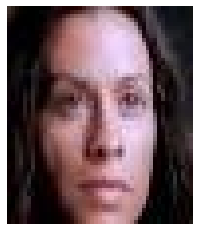

In [18]:

plt.imshow(x_data[0]/255)
plt.axis("off")

In [6]:
model.get_layer(name='pool_3')

AttributeError: ignored

In [113]:
print(min(5,10))

5


In [21]:
layer_output=model_copy.get_layer('pool_3').output.shape[3]
print(layer_output)

60


Official to write it

In [6]:
cl_x_test, cl_y_test = data_loader(clean_data_filename)
bd_x_test, bd_y_test = data_loader(poisoned_data_filename)

In [10]:
clean_data_acc = 98.64899974019225 # original accuracy
model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
prune_index = []
clean_acc = []
asrate = []
for channel_num in range(model_copy.get_layer('pool_3').output.shape[3]):
  min_value = 99999.9999
  min_prune_index = 0
  layer_output=model_copy.get_layer('pool_3').output
  intermediate_model=keras.models.Model(inputs=model_copy.input,outputs=layer_output)
  intermediate_prediction=intermediate_model.predict(cl_x_test)  
  temp = np.mean(intermediate_prediction,axis=(0,1,2))
  for index, value in enumerate(temp):
    if index not in prune_index:
      min_value = min(min_value, value)
      min_prune_index = index
  prune_index.append(min_prune_index)
  # index = 5 means 'pool_3'
  weight_0 = model_copy.layers[5].get_weights()[0]
  bias_0 = model_copy.layers[5].get_weights()[1]
  weight_0[:,:,:,min_prune_index] = 0
  bias_0[min_prune_index] = 0
  cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
  clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
  if (clean_data_acc-clean_accuracy <= 2):
    model_copy.save('model_X=2.h5')
  if (clean_data_acc-clean_accuracy <= 4):
    model_copy.save('model_X=4.h5')
  if (clean_data_acc-clean_accuracy <= 10):
    model_copy.save('model_X=10.h5')
  clean_acc.append(clean_accuracy)
  bd_label_p = np.argmax(model_copy.predict(bd_x_test), axis=1)
  asr = np.mean(np.equal(bd_label_p, bd_y_test))*100
  asrate.append(asr)

In [12]:
print(clean_acc)
print(asrate)

[98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225, 98.64899974019225]
[100.0, 100.0, 100.0, 100.0, 100.0]


In [9]:

model_copy = keras.models.clone_model(model)
model_copy.set_weights(model.get_weights()) 
cl_label_p = np.argmax(model_copy.predict(cl_x_test), axis=1)
clean_accuracy = np.mean(np.equal(cl_label_p, cl_y_test))*100
print(clean_accuracy)

98.64899974019225


In [26]:
model_copy.save('my_model=2.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
